# Evolution Of The Mass-Observable Relation

Here we fit the mu-m200 mass observable relation. We disscuss the evolution of the slope.

## Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({'font.size': 16})
#Plotting parameters
import matplotlib as mpl

mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.labelsize'], mpl.rcParams['ytick.labelsize'] = 20, 20

# Parameters used in this module
# One dictionary to store default values
# Another that user can view/change as necessary
Default_Params = {'default_cmap'   : plt.cm.coolwarm,
                  'title_fontsize' : 25,
                  'legend_fontsize': 22,
                  'xlabel_fontsize': 30,
                  'ylabel_fontsize': 30,
                  'scatter_factor' : 1.0}

Params = Default_Params.copy()

import seaborn as sns; sns.set(color_codes=True)
sns.set_style("whitegrid")

import numpy as np
from scipy.interpolate import interp1d
import scipy

import pandas as pd

from astropy.table import Table, vstack
from astropy.io.fits import getdata

In [2]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")
from main import copacabana

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load Data

In [3]:
outpath = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/to_heidi/'
# fname   = outpath+'buzzard_v2_lambda_gt20_mu-star_rhod.fits'
fname   = outpath+'buzzard_v2_lambda_gt5_small_mu-star_r200.fits'

cat = Table(getdata(fname))

In [4]:
N = len(cat)
print('sample size: %i'%N)

sample size: 78952


In [5]:
cat.colnames

['CID',
 'M200',
 'LAMBDA_CHISQ',
 'cosi',
 'redshift',
 'tile',
 'MU_gauss001_r200_02Lstar',
 'MU_TRUE_gauss001_r200_02Lstar',
 'MU_ERR_JK_gauss001_r200_02Lstar',
 'MU_TRUE_ERR_JK_gauss001_r200_02Lstar',
 'Ngals_gauss001_r200_02Lstar',
 'Ngals_true_gauss001_r200_02Lstar',
 'MU_gauss003_r200_02Lstar',
 'MU_TRUE_gauss003_r200_02Lstar',
 'MU_ERR_JK_gauss003_r200_02Lstar',
 'MU_TRUE_ERR_JK_gauss003_r200_02Lstar',
 'Ngals_gauss003_r200_02Lstar',
 'Ngals_true_gauss003_r200_02Lstar',
 'MU_gauss005_r200_02Lstar',
 'MU_TRUE_gauss005_r200_02Lstar',
 'MU_ERR_JK_gauss005_r200_02Lstar',
 'MU_TRUE_ERR_JK_gauss005_r200_02Lstar',
 'Ngals_gauss005_r200_02Lstar',
 'Ngals_true_gauss005_r200_02Lstar',
 'MU_dnf_model_r200_02Lstar',
 'MU_TRUE_dnf_model_r200_02Lstar',
 'MU_ERR_JK_dnf_model_r200_02Lstar',
 'MU_TRUE_ERR_JK_dnf_model_r200_02Lstar',
 'Ngals_dnf_model_r200_02Lstar',
 'Ngals_true_dnf_model_r200_02Lstar']

### Set Variables

In [6]:
sns.set_context('talk',font_scale=1.5)

In [7]:
def get_mustar_log(x):
    x = np.where(x<0.,10e10,x)
    return x

In [8]:
## Pivot points
run = 'gauss003_r200_02Lstar'
Mp = 10.**15.5#np.nanmedian(cat['M200_true'])
Mup= np.nanmedian(cat['MU_%s'%run])

print('Pivot Points')
print(r'M200: %.2e $M_{\odot}$'%Mp)
print(r'$\mu_{\star}: %.2e M_{\odot}$'%(Mup*1.0e10))

Pivot Points
M200: 3.16e+15 $M_{\odot}$
$\mu_{\star}: 5.03e+11 M_{\odot}$


In [9]:
run = 'gauss003_r200_02Lstar'
mask = (cat['MU_%s'%run]>0.)&(cat['LAMBDA_CHISQ']>=20.)

zcls = np.array(cat['redshift'][mask])
m200 = np.array(cat['M200'][mask]/Mp)

mu    = get_mustar_log(cat['MU_%s'%run][mask]/Mup)
muerr = get_mustar_log(cat['MU_ERR_JK_%s'%run][mask]/Mup)

mut   = get_mustar_log(cat['MU_TRUE_%s'%run][mask]/Mup)
muterr= get_mustar_log(cat['MU_TRUE_ERR_JK_%s'%run][mask]/Mup)

ng    = np.array(cat['Ngals_%s'%run][mask])
ngt   = np.array(cat['Ngals_true_%s'%run][mask])

In [10]:
x = m200
y1= mu
y2= mut
y3= ngt
y4= ng

y1err = muerr
y2err = muterr

In [11]:
# plt.scatter(mut,(muterr/mut),alpha=0.3)
# plt.xscale('log')

### mu-star distribution

In [12]:
ylabel = r'$ \mu_{\star} $'
xlabel = r'$ M_{200} $'

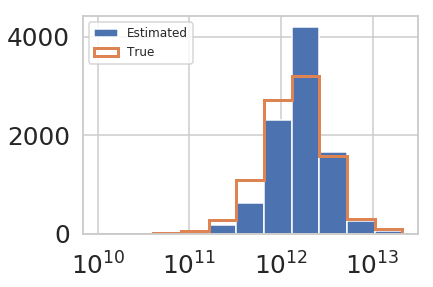

In [13]:
mulogbins = np.logspace(10.,np.log10(np.max(mu*Mup*1e10)),12)#np.logspace(10,13.5,12)
a = plt.hist(mu*Mup*1e10,range=(10**10,10**13.5),bins=mulogbins,label='Estimated')
_ = plt.hist(mut*Mup*1e10,range=(10**10,10**13.5),
             bins=mulogbins,histtype='step',lw=3,label='True')

plt.xscale('log')
plt.legend(fontsize=12)

In [14]:
#np.count_nonzero(mu==0)

Text(0,0.5,'$ \\mu_{\\star} $')

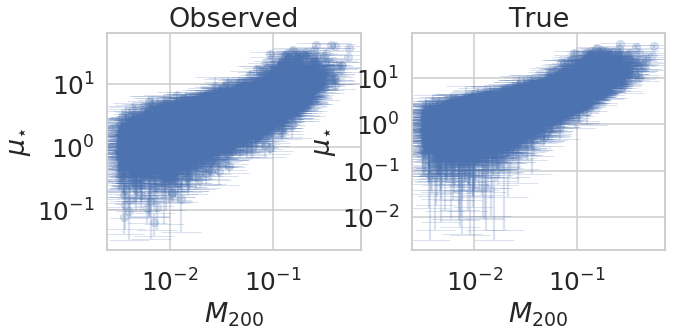

In [15]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)

ax.loglog()
# ax.scatter(x, y1,alpha=0.5)
ax.errorbar(x, y1, yerr=y1err, ls=' ',fmt='o', markersize=8, capsize=20, alpha=0.2)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Observed')
# ax.set_xlim(10**13.5,10**15.2)
# ax.set_ylim(10**11.,10**13.8)

ax = fig.add_subplot(122)
ax.loglog()
# ax.scatter(x, y2,alpha=0.5)
ax.errorbar(x, y2, yerr=y2err, ls=' ',fmt='o', markersize=8, capsize=20, alpha=0.2)
ax.set_xlabel(xlabel)
ax.set_title('True')
ax.set_ylabel(ylabel)

# ax.set_ylim(10**11.,10**13.8)
# ax.set_xlim(10**13.5,10**15.2)

## Second Order Model

In [16]:
def qmodel(theta,x):
    a, b, c = theta
    return a*x**2 + b*x + c
    
def lnlike(theta, x, y, yerr):
    a, b, c, ln_sig = theta
    model = a*x**2 + b*x + c
    inv_sigma2 = 1.0/(yerr**2 + ln_sig**2)
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [17]:
def lnprior(theta):
    a, b, c, ln_sig = theta
    if (0. < ln_sig < 0.5) and (a>-0.5) and (b>0.) and (c>0.):
        return 0.
    return -np.inf

In [18]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [19]:
import scipy.optimize as op

def get_inital_guess(x,y,yerr):
    nll = lambda *args: -lnlike(*args)
    result = op.minimize(nll, [0.3, 0.72, 0.5, -2.], args=(x, y, yerr))
    a_ml, b_ml, c_ml, lnf_ml = result["x"]

    return a_ml, b_ml, c_ml, lnf_ml

In [20]:
from scipy import odr

quad_model = odr.Model(qmodel)
def fit_poly_2nd(x,y,yerr=None,guess=[0.3,0.7,1.]):
    # Create a RealData object
    data = odr.RealData(x, y, sy=yerr)

    # Set up ODR with the model and data.
    model = odr.ODR(data, quad_model, beta0=guess, maxit=100)

    # Run the regression.
    out  = model.run()
    
    #print fit parameters and 1-sigma estimates
    popt = out.beta
    perr = out.sd_beta
    
    dof  = len(y)-1
    sig2 = np.sqrt(np.sum((y - qmodel(popt,x))** 2) / dof)
    sig2p= np.sqrt(np.sum((y - qmodel(popt+1*perr,x))** 2) / dof)
    sig2m= np.sqrt(np.sum((y - qmodel(popt-1*perr,x))** 2) / dof)
    siger= sig2p-sig2
    
    popt = np.append(popt,sig2)
    perr = np.append(perr,np.array([3*siger]))
    print('fit parameter 1-sigma error')
    print('———————————–')
    for i in range(len(popt)):
        print('%i: %.5f \t %.5f'%(i, popt[i],perr[i]))
        
    return popt, perr

In [21]:
def plot_cop(x,y,yerr,vals,nstd=1.,ax=None,label=None):
    popt, perr = vals
    sig = popt[-1]
    if ax is None: ax = plt.axes()
    # prepare confidence level curves
    popt_up = popt[:3] + nstd * perr[:3]
    popt_dw = popt[:3] - nstd * perr[:3]

    x_fit  = np.linspace(min(x), max(x), 100)
    fit    = qmodel(popt[:3], x_fit)
    fit_up = qmodel(popt_up, x_fit)
    fit_dw = qmodel(popt_dw, x_fit)
    
    #ax.errorbar(x, y, yerr=yerr, ecolor='lightgray', fmt='none', label='data', alpha=0.5, s=5)
    p = ax.plot(x_fit, fit, lw=2, label=label)
    color = p[0].get_color()
    ax.fill_between(x_fit, fit_up, fit_dw, alpha=.5,color=color)
    #plt.legend(loc='lower right',fontsize=18)

In [22]:
# plot_cop(xl,y,yerr,[guess,gerr],nstd=5.)
# plt.scatter(xl,y,s=10,alpha=0.5,color='lightgray')

In [23]:
x0_prior_min = np.array([0.2,1.25,1.6,0.10])
x0_prior_max = np.array([0.4,1.75,2.5,0.25])

In [24]:
import emcee
def run_emcee(x,y,yerr,nsteps=1000,nwalkers=100,discard=100):
    guess,gerr = fit_poly_2nd(x,y,1/np.sqrt(10**y))

    ndim= 4
    pos = [guess + gerr*np.random.randn(ndim) for i in range(nwalkers)]
    print(pos[0])
    #pos = list(np.array([np.random.uniform(xmin,xmax, nwalkers) for xmin, xmax in zip(x0_prior_min,x0_prior_max)]).T)

    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
    sampler.run_mcmc(pos, nsteps)
    
    samples = sampler.chain[:, discard:, :].reshape((-1, ndim)).copy()
    sampler.reset()
    return samples

In [25]:
## get pars results
def get_scatter(samples,x,y):
    ## get scatter
    dof  = len(y)-1
    ym   = 0#np.array([qmodel(theta[:3],x) for theta in samples])
    for i in range(3):
        ym += samples[:,i]*x[:,np.newaxis]**int(2-i)
    sig2 = np.sqrt(np.sum((y[:,np.newaxis] - ym)** 2,axis=0) / dof)
    return sig2
    
def get_emcee_results(samples,p=[2.5,97.5]):
    pars = list(map(lambda v: (v[1], v[2], v[0]), zip(*np.percentile(samples, [p[0], 50, p[1]],axis=0))))
    mydict  = dict()
    mypars  = ['beta2','beta1','alpha','scatter']
    for li, ppi in zip(mypars,pars):
        for mi,pi in zip(['','+','-'],ppi):
            mydict[li+mi] = pi
    return mydict


In [26]:
def plot_chain(samples,ndim=4):
    fig, axes = plt.subplots(4, figsize=(10, 9), sharex=True)
    labels = ['beta2','beta1','alpha','log_sig']
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i],fontsize=12)
        ax.yaxis.set_label_coords(-0.1, 0.5)

    axes[-1].set_xlabel("step number");


# Devolop Fit Plot Tool

In [27]:
def get_output_variables(x,y,intercept,slope,scatter,percentile=[2.5,97.5]):
    output_Data = dict()
    output_Data['x']  = x
    output_Data['y']  = np.percentile(y, 50, 0)
    output_Data['y-'] = np.percentile(y, percentile[0], 0)
    output_Data['y+'] = np.percentile(y, percentile[1], 0)

    output_Data['slope']  = np.percentile(slope, 50, 0)
    output_Data['slope-'] = np.percentile(slope, percentile[0], 0)
    output_Data['slope+'] = np.percentile(slope, percentile[1], 0)

    output_Data['scatter']  = np.percentile(scatter, 50, 0)
    output_Data['scatter-'] = np.percentile(scatter, percentile[0], 0)
    output_Data['scatter+'] = np.percentile(scatter, percentile[1], 0)
    
    output_Data['intercept']  = np.percentile(intercept, 50, 0)
    output_Data['intercept-'] = np.percentile(intercept, percentile[0], 0)
    output_Data['intercept+'] = np.percentile(intercept, percentile[1], 0)
    
    return output_Data

def func_line(x,alpha,slope):
    return alpha+slope*x

In [28]:
from collections import defaultdict
from kllr import *
import linmix

class mass_observable_relation:
    """This class perfom the fit of the mass-observable relation
    
    Parameters:
    x: indepedent variable (Cluster Mass)
    y: depedent varibale (Observable)
    y_err: error on the indepedent variable
    dataset_name: key name for the loaded dataset; used to save the temp files
    
    Functions:
    __init__()
    
    add_dataset(name,x,y,y_err=None)
    fit(name,is_log=False,bins=None,nbins=16)
    
    """
    def __init__(self):
        print('Welcome Mass-Observable Relation Fit')
        self.data  = defaultdict(dict)
    
    def add_dataset(self,name,x,y,y_err=None,y_label='y',truncate=None):
        if truncate is not None:
            yl, yh = truncate
            yc = y.copy()
            mask = (yc>yl)&(yc<yh)
            self.data[name]['delta'] = mask
            y = np.where(y<yl,yl,y)
            y = np.where(y>yh,yh,y)
            
        else:
            self.data[name]['delta'] = np.full(y.shape,True)
            
        self.data[name]['x'] = np.array(x)
        self.data[name]['y'] = np.array(y)
        
        self.data[name]['log_x']     = np.log10(np.array(x))
        self.data[name]['log_y']     = np.log10(np.array(y))
        
        if y_err is not None:
            self.data[name]['y_err']     = y_err
            self.data[name]['log_y_err'] = y_err/np.array(y)
        else:
            self.data[name]['y_err']     = None
            self.data[name]['log_y_err'] = None
        
        self.data[name]['ylabel']    = y_label
    
    def fit_kllr(self,name,is_log=False,bins=None,nbins=11,percentile=[16,84],
                 kernel_type = 'gaussian', kernel_width = 0.45,fast_calc=False,
                 xrange=None, nBootstrap=100, verbose = True):
        
        ## load variables
        x, y, y_err,_ = self.get_variable(name,is_log=is_log)
        
        ## set y_err to none
        #y_err = None
        
        ## get nbins percentile
        if nbins is not None: bins = np.nanpercentile(x,np.linspace(0,100,nbins))
        
        lm = kllr_model(kernel_type = kernel_type, kernel_width = kernel_width)
        out = lm.fit(x, y, y_err, xrange, bins, nBootstrap, fast_calc, verbose)
        
        # out =  xv, y_exp, intercept_exp, slope_exp, scatter_exp
        
        ## save standard output
        ## format: x, y, y-, y+, slope, slope+, slope-, scatter, scatter-, scatter+
        self.data[name]['kllr'] = get_output_variables(*out[:5],percentile=percentile)
        

    def fit_linmix(self,name, nbins=11, bins=None, is_log=False, K=3, percentile=[2.5,97.5],
                   nchains=12, silent=True, maxiter=50000):
        x, y, y_err, delta = self.get_variable(name,is_log=is_log)
        
        if ((delta == False).any())&(y_err is not None):
            print('here')
            y_err[~delta] = 0.#np.nanmedian(y_err[delta])
            
        lm = linmix.LinMix(x, y, ysig=y_err, delta=delta, K=K, nchains=nchains)
        lm.run_mcmc(silent=silent,maxiter=maxiter)
        
        alpha, beta = lm.chain[:]['alpha'],lm.chain[:]['beta']
        scatter     = np.sqrt(lm.chain[:]['sigsqr'])

        # extend results along x-vec
        ## get nbins percentile
        if bins is None: bins = np.nanpercentile(x,np.linspace(0,100,nbins))
        
        ## compute out the fitted lines
        xbins= np.tile(bins,(len(alpha),1))
        ybins= func_line(xbins,alpha[:,np.newaxis],beta[:,np.newaxis])
        
        #sscatter= np.std(ybins-np.median(ybins,0))
        bbeta  = np.tile(beta,(len(bins),1)).T
        sscater= np.tile(scatter,(len(bins),1)).T
        aalpha = np.tile(alpha,(len(bins),1)).T
        
        ## save standard output
        ## format: x, y, y-, y+, slope, slope+, slope-, scatter, scatter-, scatter+
        self.data[name]['linmix'] = get_output_variables(bins,ybins,aalpha,bbeta,sscater,percentile=percentile)      
    
    def fit_emcee(self, name, nwalkers=64, nsteps=1000, discard=100,
                  nbins=11,bins=None, is_log=False, percentile=[2.5,97.5]):
        x, y, y_err, delta = self.get_variable(name,is_log=is_log)
        if ((delta == False).any())&(y_err is not None):
            print('here')
            y_err[~delta] = 0.#np.nanmedian(y_err[delta])
        
        #y_err   = 1/np.sqrt(10**y) 
        mychain = run_emcee(x,y,y_err,nsteps=nsteps,nwalkers=nwalkers, discard=int(discard))
        out     = get_emcee_results(mychain, p=percentile) ## results in self.data[name]['emcee']
        self.data[name]['emcee'] = out
        self.data[name]['emcee']['chain'] = mychain
        pass
        
    def get_variable(self,name,is_log=False):
        myvars = ['x','y','y_err','delta']
        
        if is_log: myvars = ['log_%s'%vi for vi in myvars]
        x = self.data[name][myvars[0]][:]
        y = self.data[name][myvars[1]][:]
        y_err = self.data[name][myvars[2]]
        delta = self.data[name]['delta']
        return x,y,y_err,delta


In [29]:
#mbins = np.log10(np.array([1e-3,7e-3,1e-2,3e-2,5e-2,1e-1,3e-1,1.]))
mbins = np.arange(-2.5,0.,0.25)

## Evolution 

In [30]:
def makeBin(variable, xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

In [31]:
zbins = np.percentile(zcls,np.linspace(0,100,16))
# zbins = np.array([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])

zkeys, zmed = makeBin(zcls,zbins)
zlabel = [r'%.3f < z < %.3f'%(zl,zh) for zl,zh in zip(zbins[:-1],zbins[1:])]

In [201]:
outs = []

print('Evolution Fit')
for idx,zli in zip(zkeys,zlabel):
    
    mor = mass_observable_relation()
    print('zbin: %s'%zli)
    #mor.add_dataset('observed',x[idx],y1[idx],y1err[idx],y_label='mu_obs')
    #mor.fit_emcee('observed',is_log=True,nbins=16,percentile=[16,84],nsteps=2000, nwalkers=100)
    
    mor.add_dataset('true',x[idx],y2[idx],y2err[idx],y_label='mu_tru')
    mor.fit_emcee('true',is_log=True,nbins=16,percentile=[16,84],nsteps=1000, nwalkers=50)
    
    outs.append(mor)
    print('\n')
    
print('done')

Evolution Fit
Welcome Mass-Observable Relation Fit
zbin: 0.200 < z < 0.277
fit parameter 1-sigma error
———————————–
0: 0.28382 	 0.03281
1: 1.55327 	 0.09237
2: 2.00545 	 0.06279
3: 0.15854 	 0.00778
[0.24230684 1.37795722 1.91349548 0.16352934]


Welcome Mass-Observable Relation Fit
zbin: 0.277 < z < 0.327
fit parameter 1-sigma error
———————————–
0: 0.30805 	 0.03500
1: 1.64792 	 0.10483
2: 2.13035 	 0.07585
3: 0.15191 	 0.00768
[0.29402867 1.65685543 2.16649544 0.14157663]


Welcome Mass-Observable Relation Fit
zbin: 0.327 < z < 0.362
fit parameter 1-sigma error
———————————–
0: 0.29389 	 0.04047
1: 1.70662 	 0.12005
2: 2.34354 	 0.08674
3: 0.16205 	 0.00656
[0.27072405 1.84266204 2.22803797 0.1587795 ]


Welcome Mass-Observable Relation Fit
zbin: 0.362 < z < 0.392
fit parameter 1-sigma error
———————————–
0: 0.17869 	 0.04283
1: 1.35784 	 0.12407
2: 2.09624 	 0.08745
3: 0.15851 	 0.00564
[0.17121052 1.30822321 2.02381799 0.15840654]


Welcome Mass-Observable Relation Fit
zbin: 0.392 <

In [34]:
import pickle 

def save_mor_results(key,outs,root='/data/des61.a/data/johnny/toto'):
    fname = root+'/%s_mass-obsevable_evol.obj'%key
    file_pi = open(fname, 'w') 
    pickle.dump(outs, file_pi)
    file_pi.close()
    
def load_mor_results(key,root='/data/des61.a/data/johnny/toto'):
    fname = root+'/%s_mass-obsevable_evol.obj'%key
    filehandler = open(fname, 'r') 
    p2 = pickle.load(filehandler)
    filehandler.close()
    return p2

In [35]:
save_mor_results('lbd_gt5_uniform_prior_nbins16',outs)

NameError: name 'outs' is not defined

In [36]:
out_uniform = load_mor_results('lbd_gt5_uniform_prior_nbins16')
out_gauss   = load_mor_results('lbd_gt5_nbins16',root='./')

In [37]:
#mor_relation_label = r'$\langle log_{10} \mu_{\star} | M_{200} \rangle  = \alpha+\beta \; log_{10} (M_{200}/M_p)$' 
mor_relation_label = r'$\langle log_{10} \mu_{\star} | M_{200} \rangle  = \alpha+\beta_1 \; log_{10} (M_{200}/M_p)+\beta_2 \; log_{10} (M_{200}/M_p)^2$' 

In [38]:
zbins2 = np.array([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])
zmed2  = 0.5*(zbins2[1:]+zbins2[:-1])

In [39]:
out1 = out_gauss
out2 = out_uniform

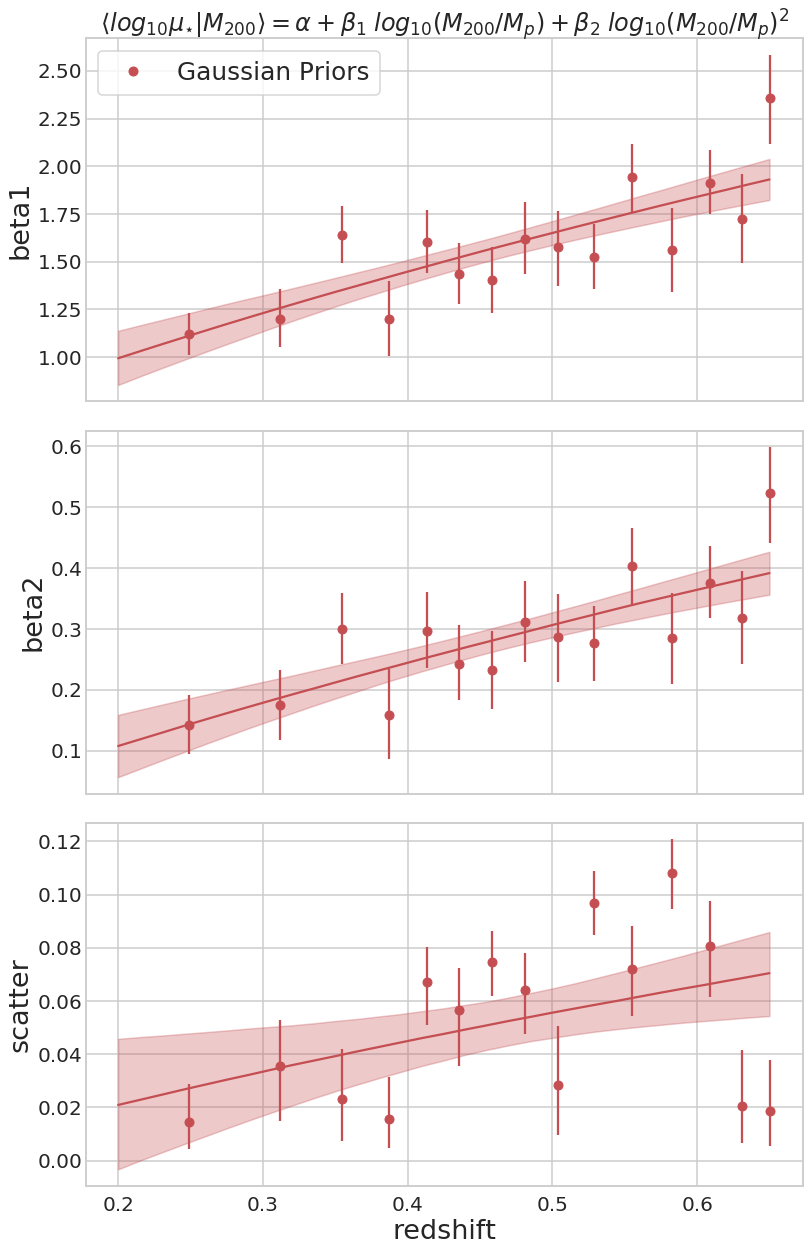

In [42]:
#Generate figure if none provided
fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharex = True) #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(hspace = 0.025)

# name = 'observed'
# plot_par_evolution(zmed,out1,'beta1',   name,ax=ax[0], color='b', color2='b',label='Gaussian Priors')
# plot_par_evolution(zmed,out1,'beta2'    ,name,ax=ax[1], color='b', color2='b')
# plot_par_evolution(zmed,out1,'alpha'  ,name,ax=ax[2], color='b', color2='b')

name = 'true'
plot_par_evolution(zmed+0.01,out2,'beta1',   name,ax=ax[0], color='r', color2='r',label='Gaussian Priors')
plot_par_evolution(zmed+0.01,out2,'beta2'    ,name,ax=ax[1], color='r', color2='r')
plot_par_evolution(zmed+0.01,out2,'scatter'  ,name,ax=ax[2], color='r', color2='r')

ax[0].legend(loc=2)
ax[0].set_title(mor_relation_label,fontsize=24)
ax[2].set_xlabel('redshift')
fig.tight_layout()
fig.savefig('mor_parameters_evolution.png')

In [41]:
def plot_par_evolution(zmed,outs,var,name,ax=None,zp=0.35,color='b',color2='k',label=''):
    if ax is None: ax = plt.axes()
    
    to_fit = []
    for i in range(len(outs)):
        self = outs[i]
        zi = zmed[i]
        
        lm = self.data[name]['emcee']            
        median = np.mean(lm[var])
        lower_quartile, upper_quartile = np.mean(lm[var+'-']),np.mean(lm[var+'+'])
        si = 0.5*(upper_quartile-lower_quartile)
            
        to_fit.append([zi,median,si,lower_quartile,upper_quartile])

    to_fit = np.array(to_fit).T
    
    p = ax.plot(to_fit[0], to_fit[1], 'o', color=color,label=label)
    ax.vlines(to_fit[0], to_fit[3], to_fit[4], color=p[0].get_color())

    eta = np.log((1+to_fit[0])/(1+zp))
    lm1 = linmix.LinMix(eta,to_fit[1], ysig=to_fit[2], K=3)
    lm1.run_mcmc(silent=True, maxiter=10000)
    
    plot_linmix(np.linspace(0.2,0.65,31),lm1,zp=zp,ax=ax,color=color2)
    ax.set_ylabel(var)
    
def plot_linmix(z,lm1,zp=0.4,ax=None,color='k',label=''):
    if ax is None: ax = plt.axes()
    
    eta = np.log((1+z)/(1+zp))
    m1 = np.median(lm1.chain['alpha'][:,np.newaxis]     + lm1.chain['beta'][:,np.newaxis]*eta,axis=0)
    q1 = np.percentile(lm1.chain['alpha'][:,np.newaxis] + lm1.chain['beta'][:,np.newaxis]*eta,16,axis=0)
    q2 = np.percentile(lm1.chain['alpha'][:,np.newaxis] + lm1.chain['beta'][:,np.newaxis]*eta,84,axis=0)
    
    p = ax.plot(z,m1,color=color,label=label)
    ax.fill_between(z,q1,q2,alpha=0.3,color=p[0].get_color())


In [95]:
names = ['beta2','beta1','alpha']
def convert_emcee_pars(self,name):
    popt,perr = [],[]
    for var in names:
        lm = self.data[name]['emcee']            
        popt.append(np.mean(lm[var]))
        
        lower_quartile, upper_quartile = np.mean(lm[var+'-']),np.mean(lm[var+'+'])
        perr.append(0.5*(upper_quartile-lower_quartile))
    return np.array(popt), np.array(perr)

def plot_mcmc_linear(self, name, nstd=1,ax=None,label=None,show_data=True):
    x,y,yerr,_ = self.get_variable(name,is_log=True)
    popt, perr = convert_emcee_pars(self,name)
    
    if ax is None: ax = plt.axes()
    # prepare confidence level curves
    popt_up = popt + nstd * perr
    popt_dw = popt - nstd * perr

    x_fit  = np.linspace(min(x), max(x), 100)
    fit    = qmodel(popt, x_fit)
    fit_up = qmodel(popt_up, x_fit)
    fit_dw = qmodel(popt_dw, x_fit)
    
    if label is None:
        label = r'$ \beta_1 = %.3f$'%(popt[1])+'\n'+r'$\beta_2 = %.3f ; \alpha=%.3f$'%(popt[0], popt[2])
    if show_data:
        ax.scatter(x, y, color='lightgray', alpha=0.75, s=5)
    p = ax.plot(x_fit, fit, lw=2, label=label)
    color = p[0].get_color()
    ax.fill_between(x_fit, fit_up, fit_dw, alpha=.5,color=color)
    ax.legend(loc='lower right',fontsize=12)

In [86]:
xxlabel  = r'$ Log(\mu_{\star,true}/10^{12}/M_{\odot})$'
yylabel  = r'$ Log(M_{200}/10^{14}/M_{\odot})$'

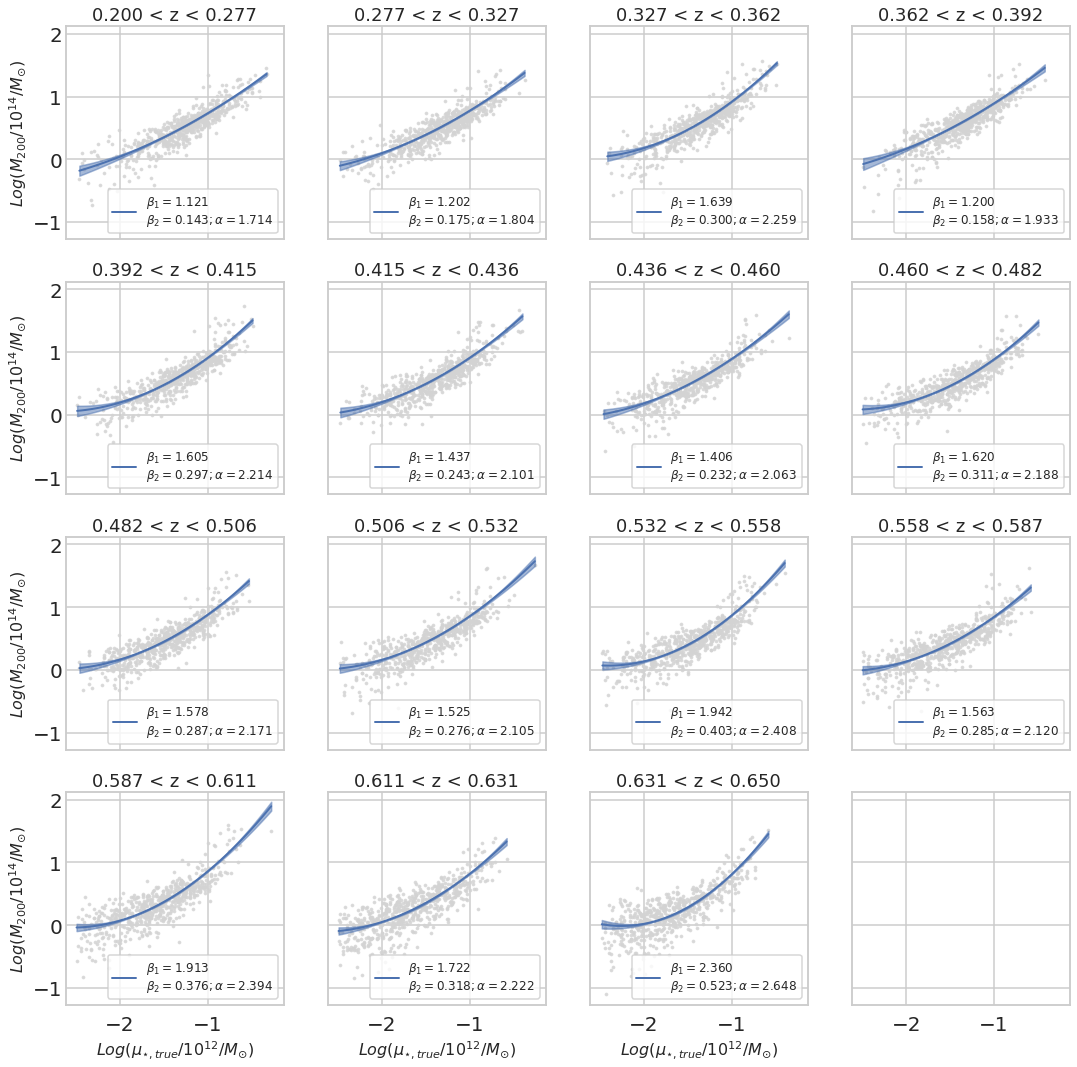

In [89]:
fig, ax = plt.subplots(4, 4, figsize=(18, 18), sharex = True, sharey=True) #gridspec_kw = {'height_ratios':[1.75, 1, 1]}

ll=0
for i in range(4):
    for j in range(4):
        plot_mcmc_linear(out_uniform[ll], 'true',ax=ax[i,j])
        ax[i,j].set_title(zlabel[ll],fontsize=18)
        ll+=1
        if j==0:
            ax[i,j].set_ylabel(yylabel, size=16)
        if i==3:
            ax[i,j].set_xlabel(xxlabel, size=16)
        if ll==len(out_uniform):
            break

# ax.set_title('Quadratic Model: y=a+b1*x+b2*x^2',fontsize=16)

Text(0.5,1,'$\\langle log_{10} \\mu_{\\star} | M_{200} \\rangle  = \\alpha+\\beta_1 \\; log_{10} (M_{200}/M_p)+\\beta_2 \\; log_{10} (M_{200}/M_p)^2$')

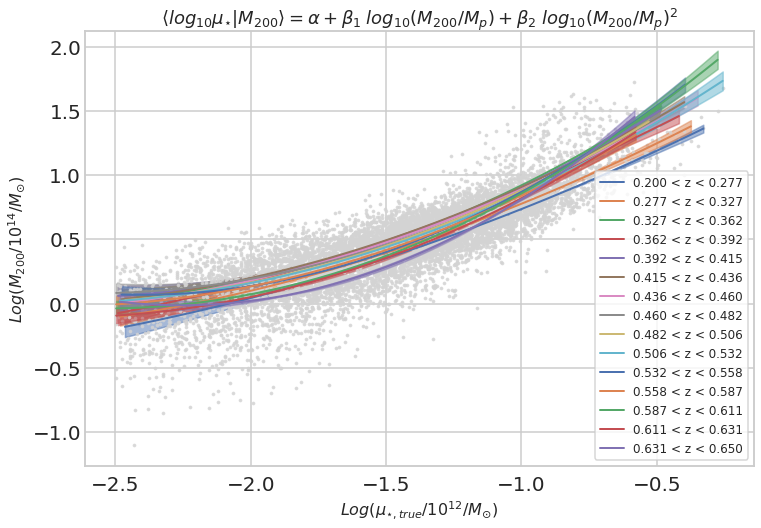

In [101]:
fig, ax = plt.subplots(1, figsize=(12, 8))

for ll in range(len(out_uniform)):
    plot_mcmc_linear(out_uniform[ll], 'true',ax=ax, label=zlabel[ll])
    
ax.set_ylabel(yylabel, size=16)
ax.set_xlabel(xxlabel, size=16)
ax.set_title(mor_relation_label, fontsize=18)

## Investivate Bad Fit

* Plot the chains for z>0.45

In [68]:
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import matplotlib

In [49]:
mychains = []
for i in range(len(zkeys)):
    mychains.append(outs[i].data['observed']['emcee']['chain'])

In [65]:
labels  = ["beta_2","beta_1","alpha","scatter"]
def plot_chain(samples,ndim=4,axes=None):
    if axes is None: fig, axes = plt.subplots(4, figsize=(10, 9), sharex=True)
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:,i], alpha=0.3)
        ax.set_xlim(0, len(samples[:,i]))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)

    axes[-1].set_xlabel("step number");

In [66]:
mychains[1][:,0].size

4000000

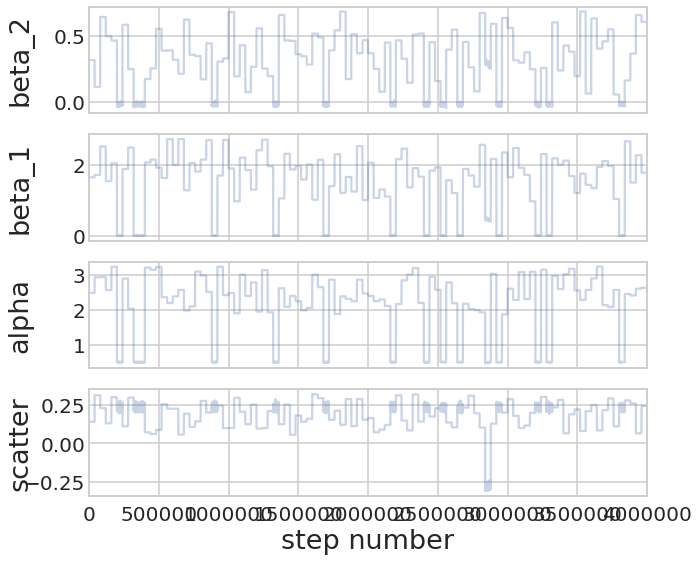

In [70]:
plot_chain(mychains[9],axes=None)

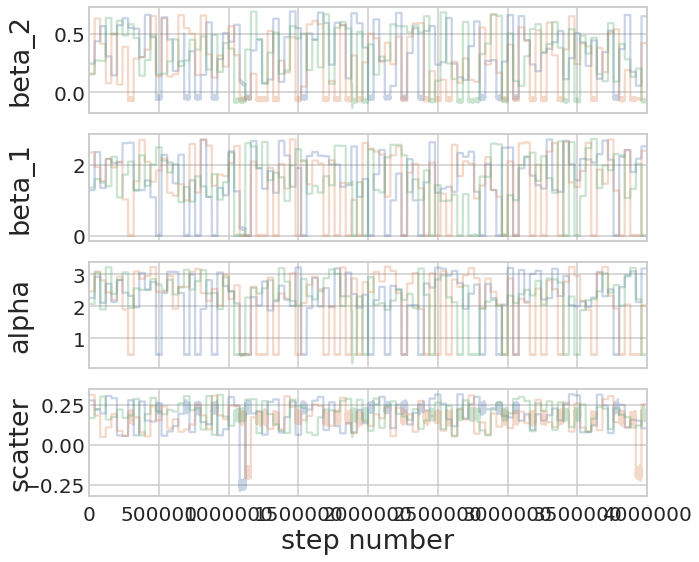

In [67]:
fig, axes = plt.subplots(4, figsize=(10, 9), sharex=True)
for i in range(12,15):
    plot_chain(mychains[i],axes=axes)

In [ ]:
## plot results
names  = ["beta_2","beta_1","alpha","scatter"]
triangle_objs = []
for i,idx in enumerate(zkeys):
    if i>10:
        mc = MCSamples(samples=mychains[i], names = names , labels = names, label=zlabel[i])
        triangle_objs.append(mc)

g = plots.get_subplot_plotter()
g.triangle_plot(triangle_objs, filled=True)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


KeyboardInterrupt: 

In [ ]:
def plot_mcmc_linear(x,y,yerr,vals,nstd=1.,ax=None,label=None):
    popt = np.flip(np.array([vals[i][0] for i in range(3)]),0)
    perr = np.flip(np.array([0.5*(vals[i][1]+vals[i][2]) for i in range(3)]),0)

    if ax is None: ax = plt.axes()
    # prepare confidence level curves
    popt_up = popt + nstd * perr
    popt_dw = popt - nstd * perr

    x_fit  = np.linspace(-1., max(x), 100)
    fit    = func(popt, x_fit)
    fit_up = func(popt_up, x_fit)
    fit_dw = func(popt_dw, x_fit)
    
    #ax.errorbar(x, y, yerr=yerr, ecolor='lightgray', fmt='none', label='data', alpha=0.5, s=5)
    p = ax.plot(x_fit, fit, lw=2, label=label)
    color = p[0].get_color()
    ax.fill_between(x_fit, fit_up, fit_dw, alpha=.5,color=color)
    #plt.legend(loc='lower right',fontsize=18)

In [ ]:
fig, ax = plt.subplots(1)
## Plot Linear
col= 'Lambda>5'
x,y,yerr = varlist[col]

linear = LinearRegression().fit(x.reshape(-1, 1), y)
xmin,xmax = np.nanmin(x),np.nanmax(x)

xline = np.linspace(xmin,xmax,1000)
ypred = linear.predict(xline.reshape(-1, 1))

ax.plot(xline,ypred,ls='--',lw=3,label='%s: Linear'%col)
ax.scatter(x,y,s=10,alpha=0.6,color='lightgray')

## Plot Quadratic
for idx,col in zip(zkeys,zlabels):
    plot_mcmc_linear(x[idx],y1[idx],y1err[idx],val,ax=ax,label=col)
    #ax.scatter(x,y,s=10,alpha=0.6,color='r')

ax.legend(fontsize=12)
ax.set_ylabel(yylabel, size=16)
ax.set_xlabel(xxlabel, size=16)
ax.set_title('Quadratic Model: y=a+b1*x+b2*x^2',fontsize=16)

In [83]:
#help(linmix.LinMix)

In [53]:
mor = mass_observable_relation()
mor.add_dataset('observed',x,y1,y1err,y_label='mu_obs')
mor.fit_emcee(  'observed',is_log=True,percentile=[16,84])
#mor.fit_kllr(   'observed' ,is_log=True,percentile=[16,84],nbins=None,bins=mbins)

Welcome Mass-Observable Relation Fit
fit parameter 1-sigma error
———————————–
0: 0.24227 	 0.01073
1: 1.38436 	 0.03339
2: 2.00726 	 0.02522
3: 0.19703 	 -1.00000


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


In [63]:
#mor.data['observed']['kllr']

In [54]:
def plot_line(x,y,ym,yp,color=None,ax=None,label="",ls='-',lw=1, fill=True):
    if ax is None: ax = plt.axes()
        
    #ax.plot(x, y, lw=6, color='k', label="")
    p = ax.plot(x, y, color=color, label=label, ls=ls, lw=lw)
    color = p[0].get_color()
    if fill:
        ax.fill_between(x,ym,yp, lw=3, color=color, alpha = 0.4)
    return color
    
def plot_output(self,name,var,is_log=True,ax=None,color=None,show_data=True,show_kllr=True):
    if ax is None: ax = plt.axes()

#     linmix = self.data[name]['linmix']        
#     color  = plot_line(linmix['x'],linmix[var],linmix[var+'-'],linmix[var+'+'],
#                        ax=ax,label='',ls='--',lw=3,color=color)

    if show_kllr:
        kllr   = self.data[name]['kllr']
        _      = plot_line(kllr['x'],kllr[var],kllr[var+'-'],kllr[var+'+']
                          ,ax=ax,label=name,color=color)
        
    if (show_data) & (var=='y'):
        x,y,_,_ = self.get_variable(name,is_log=is_log)
        ax.scatter(x,y, s=30, alpha=0.1, color=color, label="")

    return ax


In [55]:
#labels = [xlabel,ylabel]
xxlabel  = r'$ Log(\mu_{\star,true}/10^{12}/M_{\odot})$'
yylabel  = r'$ Log(M_{200}/10^{14}/M_{\odot})$'
labels   = [xxlabel,yylabel]

In [56]:
# #Generate figure if none provided
# fig, ax = plt.subplots(3, 1, figsize=(10, 19), sharex = True,
#                        gridspec_kw = {'height_ratios':[1.75, 1, 1]})

# plt.subplots_adjust(hspace = 0.05)

# [a.grid(True) for a in ax]

# cols = 'observed'
# plot_output(mor,cols, 'y', show_data=True, ax = ax[0])
# plot_output(mor,cols, 'slope'  , show_data=False, ax = ax[1])
# plot_output(mor,cols, 'scatter', show_data=False , ax = ax[2])

# ax[0].legend(fontsize=Params['legend_fontsize'])

# ax[0].set_ylabel(labels[0], size=Params['ylabel_fontsize'])
# ax[1].set_ylabel(r"$\beta\,$(%s)" % xlabel,  size=Params['ylabel_fontsize'])
# ax[2].set_ylabel(r"$\sigma\,$(%s)" % xlabel, size=Params['ylabel_fontsize'])
# ax[2].set_xlabel(labels[1], size=Params['xlabel_fontsize'])
# ax[0].set_title(r'Mass Observable Realtion: $\mu_{\star,true}$',fontsize=24)